## Data Explore and Clustering for HELP International

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Understanding Dataset's features 
nation = pd.read_csv('Data_Negara_Help.csv')
nation


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


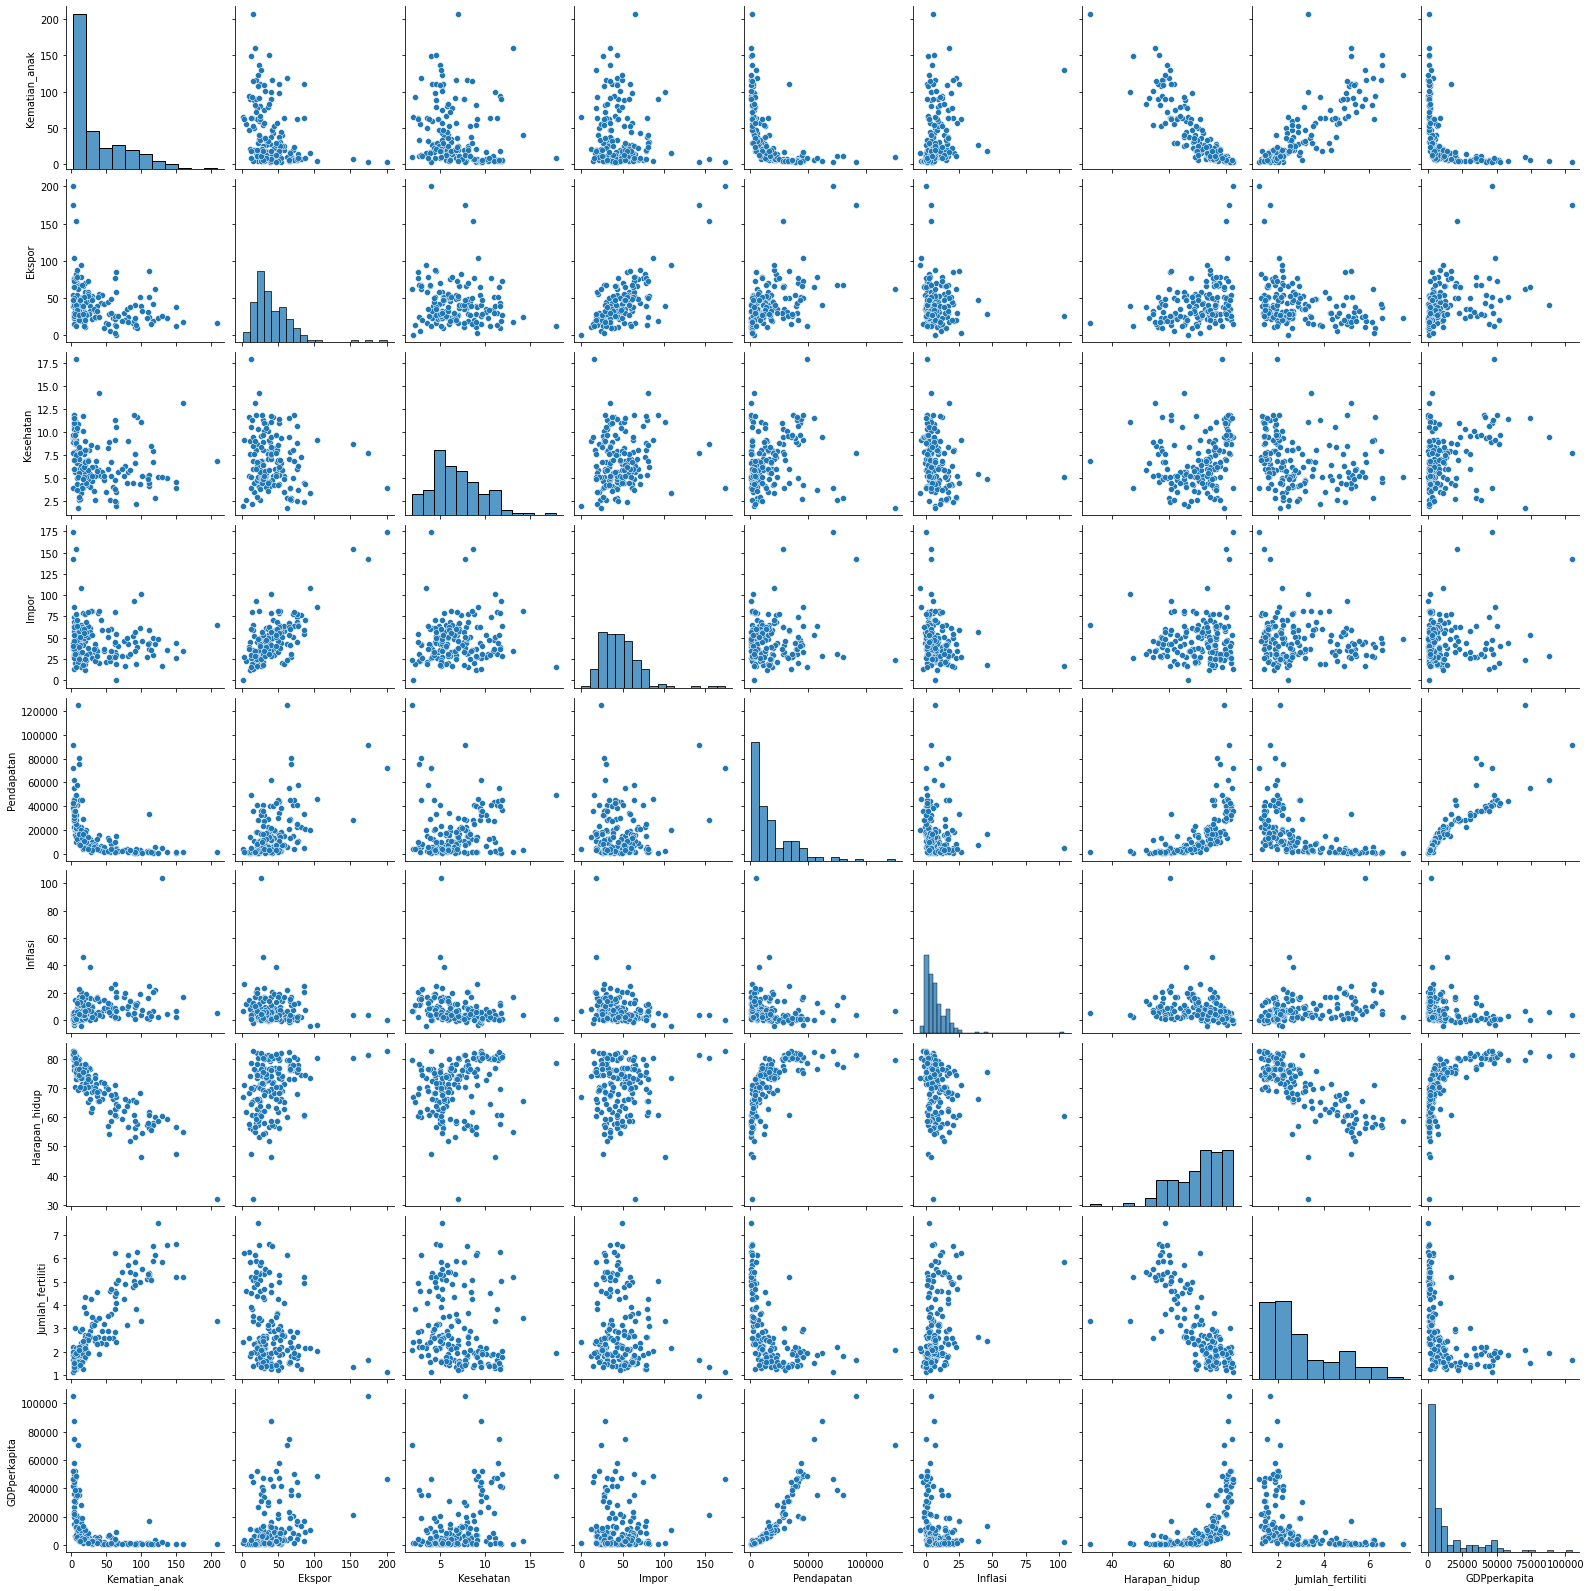

In [3]:
# Multivariate analysis on the dataset
sns.pairplot(nation);

In [4]:
nation[['Harapan_hidup','GDPperkapita']]

,Harapan_hidup,GDPperkapita
0,56.2,553
1,76.3,4090
2,76.5,4460
3,60.1,3530
4,76.8,12200
...,...,...
162,63.0,2970
163,75.4,13500
164,73.1,1310
165,67.5,1310


In [5]:
# Find missing values
nation[['Harapan_hidup','GDPperkapita']].isnull().sum()

Harapan_hidup    0
GDPperkapita     0
dtype: int64

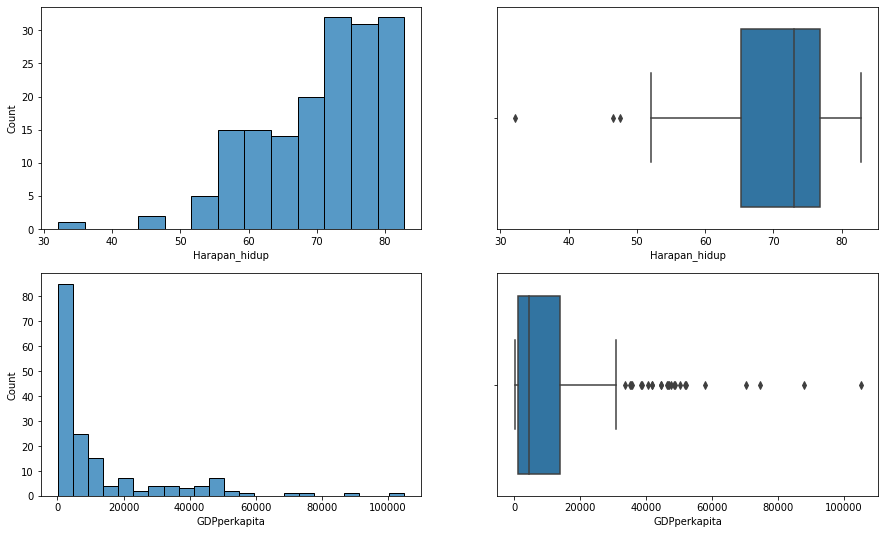

In [6]:
# Check Outliers
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(15, 9))

sns.histplot(ax=axes[0][0], data=nation, x='Harapan_hidup')
sns.histplot(ax=axes[1][0], data=nation, x='GDPperkapita')
sns.boxplot(ax=axes[0][1], data=nation, x='Harapan_hidup')
sns.boxplot(ax=axes[1][1], data=nation, x='GDPperkapita');

In [7]:
# Handle Outliers
def outlier_bound(col):
    Q3, Q1 = np.percentile(col, [75,25])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    return upper_bound,lower_bound

for column in nation[["GDPperkapita", "Harapan_hidup"]]:
    upper_bound,lower_bound = outlier_bound(nation[column])
    nation[column] = np.where((nation[column] > upper_bound), upper_bound, nation[column])
    nation[column] = np.where((nation[column] < lower_bound), lower_bound, nation[column])

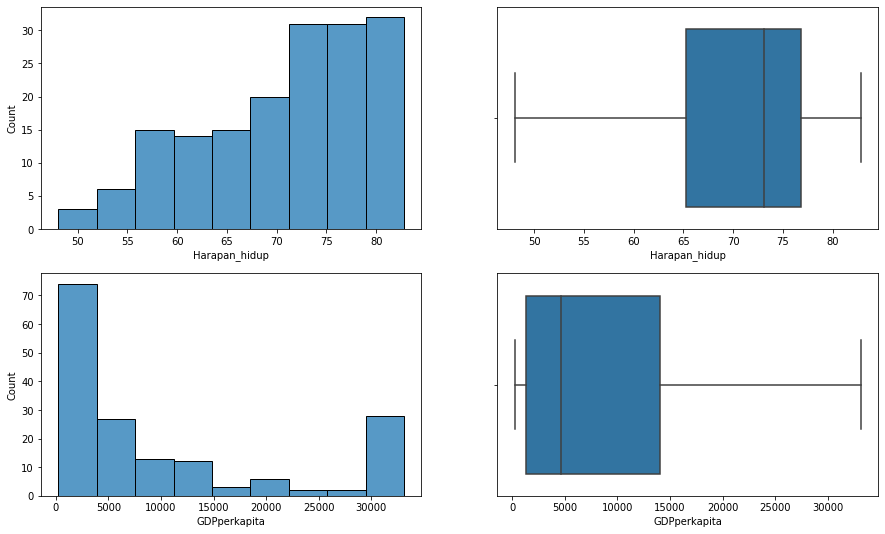

In [8]:
# Check Outliers again
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))

sns.histplot(ax=axes[0][0], data=nation, x='Harapan_hidup')
sns.histplot(ax=axes[1][0], data=nation, x='GDPperkapita')
sns.boxplot(ax=axes[0][1], data=nation, x='Harapan_hidup')
sns.boxplot(ax=axes[1][1], data=nation, x='GDPperkapita');

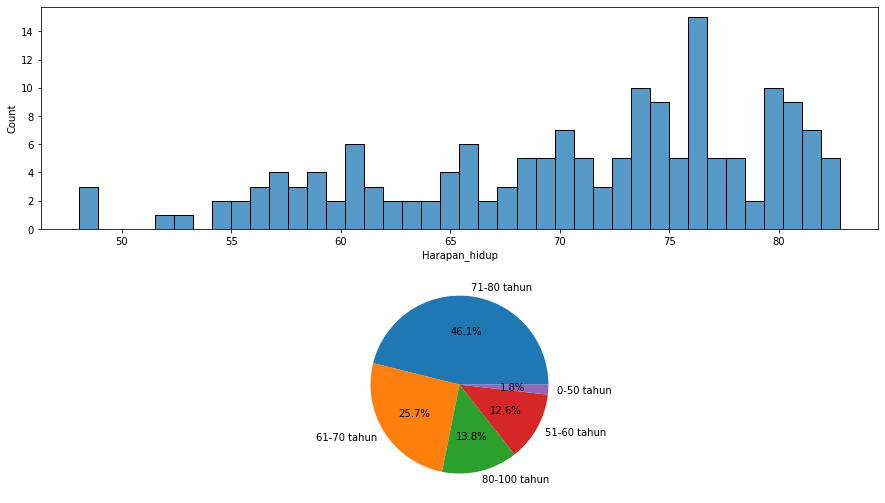

In [9]:
# Univariate analysis Harapan_hidup
fig, axes = plt.subplots(nrows=2, figsize=(15,9))

# Histogram 
sns.histplot(ax=axes[0],data=nation, bins=40,x='Harapan_hidup')

# Pie 
labels = ['0-50 tahun', '51-60 tahun','61-70 tahun', '71-80 tahun', '80-100 tahun']
data_harapan_after_grouping = (pd.cut(nation['Harapan_hidup'],bins=[0,50,60,70,80,100],labels=labels)).value_counts()
plt.pie(data_harapan_after_grouping,labels=data_harapan_after_grouping.index,autopct='%1.1f%%');

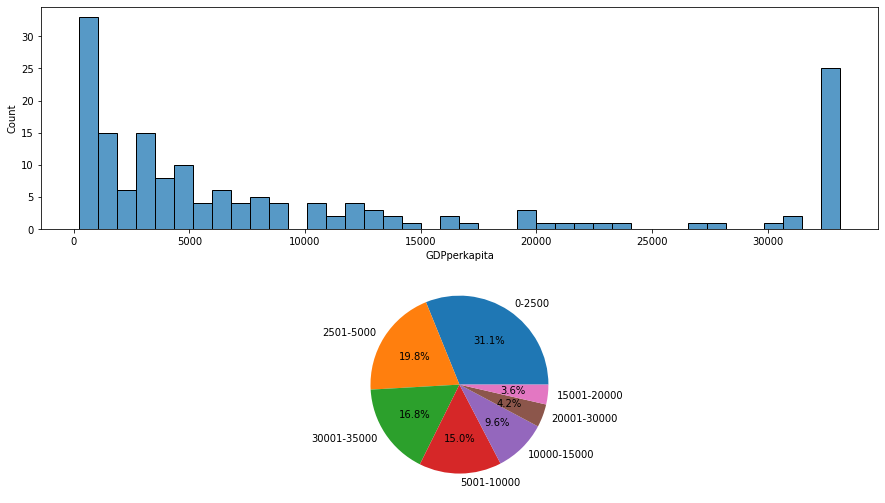

In [10]:
# Univariate analysis GDPperkapita
fig, axes = plt.subplots(nrows=2, figsize=(15,9))

# Histogram
sns.histplot(ax=axes[0],data=nation, bins=40,x='GDPperkapita')

# pie
labels = ['0-2500','2501-5000','5001-10000','10000-15000','15001-20000','20001-30000','30001-35000']
data_GDPperkapita_after_grouping = (pd.cut(nation['GDPperkapita'], bins=[0, 2500, 5000, 10000, 15000, 20000, 30000, 35000], labels=labels)).value_counts()
plt.pie(data_GDPperkapita_after_grouping, labels=data_GDPperkapita_after_grouping.index, autopct='%1.1f%%');


0.7038276968521354

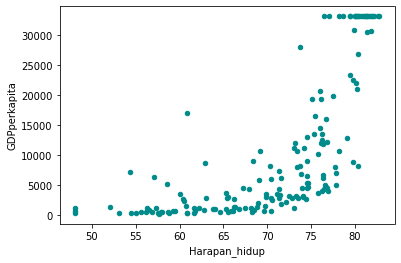

In [11]:
# Bivariate analysis 
nation.plot.scatter(x='Harapan_hidup', y='GDPperkapita',color='darkcyan');
nation['Harapan_hidup'].corr(nation['GDPperkapita'])

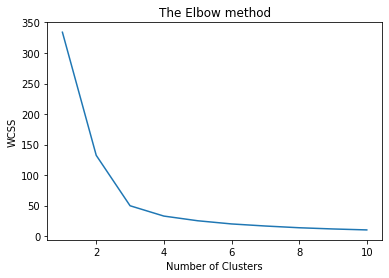

silhoutte score dari n=2 adalah 0.5756907487999181
silhoutte score dari n=3 adalah 0.5830344772740338


In [12]:
# Feature scaling
nation_harapan_GDP = nation[['Harapan_hidup','GDPperkapita']]
sc = StandardScaler()
nation_harapan_GDP_std = sc.fit_transform(nation_harapan_GDP.astype(float))

# Decide the number of clusters using elbow method 
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(nation_harapan_GDP_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Check with Silhouette score method
kmeans2 = KMeans(n_clusters=2,init='k-means++',random_state=42).fit(nation_harapan_GDP_std)
labels2 = kmeans2.labels_
kmeans3 = KMeans(n_clusters=3,init='k-means++',random_state=42).fit(nation_harapan_GDP_std)
labels3 = kmeans3.labels_

print('silhoutte score dari n=2 adalah',silhouette_score(nation_harapan_GDP_std,labels=labels2))
print('silhoutte score dari n=3 adalah',silhouette_score(nation_harapan_GDP_std,labels=labels3))

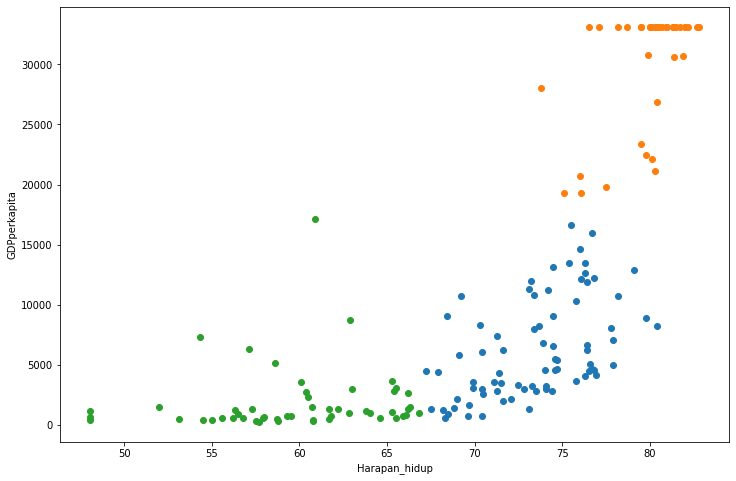

In [13]:
# Clustering with n = 3
kmeans3 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(nation_harapan_GDP_std)
labels3 = kmeans3.labels_
nation_harapan_GDP = nation_harapan_GDP.assign(label_kmeans3=labels3)

plt.figure(figsize=(12,8))
plt.scatter(nation_harapan_GDP['Harapan_hidup'][nation_harapan_GDP['label_kmeans3'] == 0], nation_harapan_GDP['GDPperkapita'][nation_harapan_GDP['label_kmeans3'] == 0])
plt.scatter(nation_harapan_GDP['Harapan_hidup'][nation_harapan_GDP['label_kmeans3'] == 1], nation_harapan_GDP['GDPperkapita'][nation_harapan_GDP['label_kmeans3'] == 1])
plt.scatter(nation_harapan_GDP['Harapan_hidup'][nation_harapan_GDP['label_kmeans3'] == 2], nation_harapan_GDP['GDPperkapita'][nation_harapan_GDP['label_kmeans3'] == 2])
plt.xlabel('Harapan_hidup')
plt.ylabel('GDPperkapita')
plt.show()



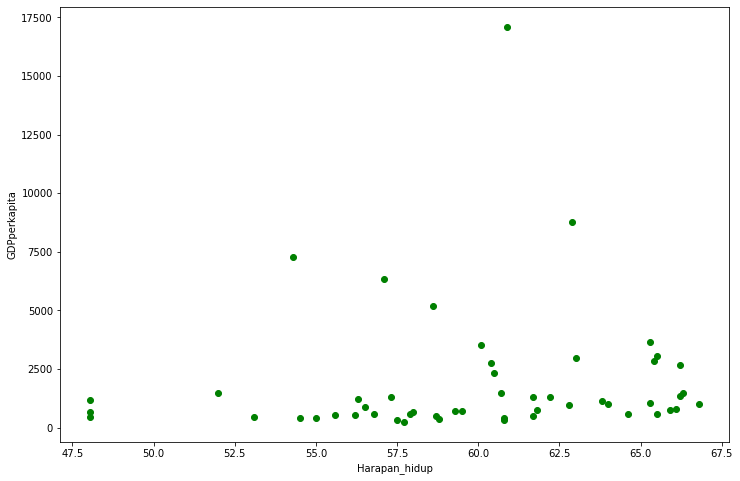

Negara klasifikasi lower cluster
['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Vanuatu', 'Zambia']


In [14]:
# Group lower cluster
plt.figure(figsize=(12, 8))
plt.scatter(nation_harapan_GDP['Harapan_hidup'][nation_harapan_GDP['label_kmeans3'] == 2], nation_harapan_GDP['GDPperkapita'][nation_harapan_GDP['label_kmeans3'] == 2], c='green')
plt.xlabel('Harapan_hidup')
plt.ylabel('GDPperkapita')
plt.show()

# Show Country in lower cluster
lower_cluster = nation_harapan_GDP['label_kmeans3'] == 2

nation_lower_cluster = []
for i in nation.Negara[lower_cluster]:
    nation_lower_cluster.append(i)
print('Negara klasifikasi lower cluster')
print(nation_lower_cluster)